## Spectrograph HP8566

Let's imitate the style of the following spectrograph

![Image Description](HP8566_Screencap_1.jpg)
![Image Description](HP8566_Screencap_2.jpg)
![Image Description](HP8566_Screencap_3.jpg)

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, Normalize
from scipy.interpolate import interp1d
import cv2
from PIL import Image, ImageFilter

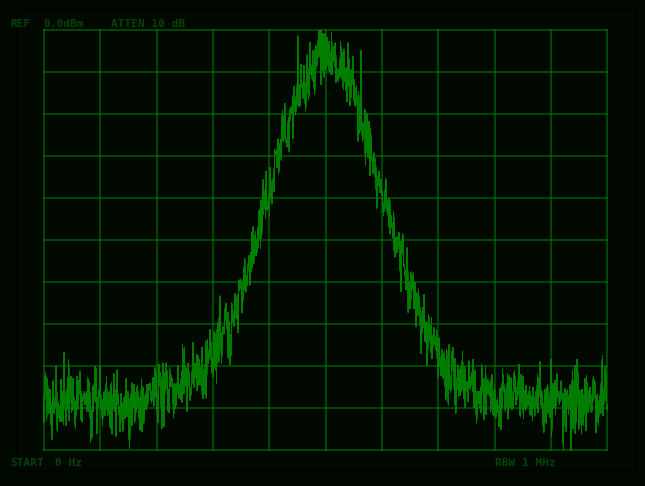

In [3]:
# Plot parameters
Num_vertical_lines = 10
Num_horizontal_lines = 10
vector_lines_color = 'green'
backgroung_color = '#000800'
grid_opacity = 0.5
graph_opacity = 0.5
grid_linewidth = 1
graph_linewidth = 0.5



# Set up the figure with a black background and white grid lines
fig, ax = plt.subplots(figsize=(8, 6), facecolor=backgroung_color)


############################################ Data ############################################

# Generate some example data for the waveform

# Gaussian function: mean = 0, standard deviation = 1
x = np.linspace(0, 10, 1000)
mu = 0  # Mean
sigma = 1  # Standard deviation
gaussian = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-(x - 5 - mu)**2 / (2 * sigma**2))

# Add some random noise to the Gaussian
noise = np.random.normal(0, 0.02, x.shape)  # Noise with mean 0 and small standard deviation
y = gaussian + noise
#y = gaussian

# Create the plot with a white waveform
for index in range(0, len(x)-1):
    # Plot a line between each point in the graph
    x_points = [x[index], x[index+1]]
    y_points = [y[index], y[index+1]]
    ax.plot(x, y, color=vector_lines_color, linewidth=graph_linewidth, alpha=graph_opacity)



############################################ Grid ############################################

# Make a fake grid line because I can't get ax.grid to do what I want.
x_ticks_spacing = ( max(x) - min(x) ) / Num_vertical_lines

for index in range(0, Num_vertical_lines+1):
    # Create a vertical line defined by 2 points at the intended horizontal position that goes from minimum graph to max graph height
    x_points = [min(x) + index * x_ticks_spacing, min(x) + index * x_ticks_spacing]
    y_points = [min(y), max(y)]
    ax.plot(x_points, y_points, linestyle='-', color=vector_lines_color, alpha=grid_opacity)

y_ticks_spacing = ( max(y) - min(y) ) / Num_horizontal_lines
for index in range(0, Num_horizontal_lines+1):
    # Create a vertical line defined by 2 points at the intended horizontal position that goes from minimum graph to max graph height
    x_points = [min(x), max(x)]
    y_points = [min(y) + index * y_ticks_spacing, min(y) + index * y_ticks_spacing]
    ax.plot(x_points, y_points, linestyle='-', color=vector_lines_color, alpha=graph_opacity)


# Customize the plot to simulate an oscilloscope look
ax.set_facecolor(backgroung_color)  # Black background

# Remove axis ticks and labels for a cleaner look
ax.set_xticklabels([])
ax.set_yticklabels([])



############################################ Text ############################################

# Graphed text parameters
font = 'monospace'
plt.rcParams['font.size'] = 8  # Set default font size for all text
plt.rcParams['font.weight'] = 'bold'  # Set default font weight (normal, bold, etc.)
plt.rcParams['font.style'] = 'normal'  # Set default font style (normal, italic, oblique)
#plt.rcParams['text.color'] = ''  # Set default font color
plt.rcParams['text.usetex'] = False  # Disable LaTeX processing
plt.rcParams['font.family'] = font  # Set to desired font

# Add text to simulate an oscilloscope display (adjust positions as needed)
top_height = max(y)*1.01
lower_height = min(y)*1.3
line_height = 0.1

plt.text(0, top_height, "0.0dBm", color=vector_lines_color, alpha=graph_opacity)
plt.text(-0.6, top_height, "REF", color=vector_lines_color, alpha=graph_opacity)
plt.text(1.2, top_height, "ATTEN 10 dB", color=vector_lines_color, alpha=graph_opacity)

plt.text(-0.6, lower_height, "START", color=vector_lines_color, alpha=graph_opacity)
plt.text(0.2, lower_height, "0 Hz", color=vector_lines_color, alpha=graph_opacity)
plt.text(8.0, lower_height, "RBW 1 MHz", color=vector_lines_color, alpha=graph_opacity)

# Display the plot
plt.show()


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.collections as mcoll
import matplotlib.path as mpath

def colorline(
    x, y, z=None, cmap=plt.get_cmap('copper'), norm=plt.Normalize(0.0, 1.0),
        linewidth=3, alpha=1.0):
    """
    http://nbviewer.ipython.org/github/dpsanders/matplotlib-examples/blob/master/colorline.ipynb
    http://matplotlib.org/examples/pylab_examples/multicolored_line.html
    Plot a colored line with coordinates x and y
    Optionally specify colors in the array z
    Optionally specify a colormap, a norm function and a line width
    """

    # Default colors equally spaced on [0,1]:
    if z is None:
        z = np.linspace(0.0, 1.0, len(x))

    # Special case if a single number:
    if not hasattr(z, "__iter__"):  # to check for numerical input -- this is a hack
        z = np.array([z])

    z = np.asarray(z)

    segments = make_segments(x, y)
    lc = mcoll.LineCollection(segments, array=z, cmap=cmap, norm=norm,
                              linewidth=linewidth, alpha=alpha)

    ax = plt.gca()
    ax.add_collection(lc)

    return lc


def make_segments(x, y):
    """
    Create list of line segments from x and y coordinates, in the correct format
    for LineCollection: an array of the form numlines x (points per line) x 2 (x
    and y) array
    """

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    return segments


'''

N = 10
np.random.seed(101)
x = np.random.rand(N)
y = np.random.rand(N)
fig, ax = plt.subplots()

path = mpath.Path(np.column_stack([x, y]))
verts = path.interpolated(steps=3).vertices
x, y = verts[:, 0], verts[:, 1]
z = np.linspace(0, 1, len(x))
colorline(x, y, z, cmap=plt.get_cmap('jet'), linewidth=2)

plt.show()
'''

"\n\nN = 10\nnp.random.seed(101)\nx = np.random.rand(N)\ny = np.random.rand(N)\nfig, ax = plt.subplots()\n\npath = mpath.Path(np.column_stack([x, y]))\nverts = path.interpolated(steps=3).vertices\nx, y = verts[:, 0], verts[:, 1]\nz = np.linspace(0, 1, len(x))\ncolorline(x, y, z, cmap=plt.get_cmap('jet'), linewidth=2)\n\nplt.show()\n"

C:\Users\guill\AppData\Local\Temp\ipykernel_13904\594731491.py:49: RankWarning: Polyfit may be poorly conditioned
  poly_coeffs = np.polyfit(x_sampled, y_sampled, poly_degree)
C:\Users\guill\AppData\Local\Temp\ipykernel_13904\594731491.py:49: RankWarning: Polyfit may be poorly conditioned
  poly_coeffs = np.polyfit(x_sampled, y_sampled, poly_degree)
C:\Users\guill\AppData\Local\Temp\ipykernel_13904\594731491.py:49: RankWarning: Polyfit may be poorly conditioned
  poly_coeffs = np.polyfit(x_sampled, y_sampled, poly_degree)
C:\Users\guill\AppData\Local\Temp\ipykernel_13904\594731491.py:49: RankWarning: Polyfit may be poorly conditioned
  poly_coeffs = np.polyfit(x_sampled, y_sampled, poly_degree)


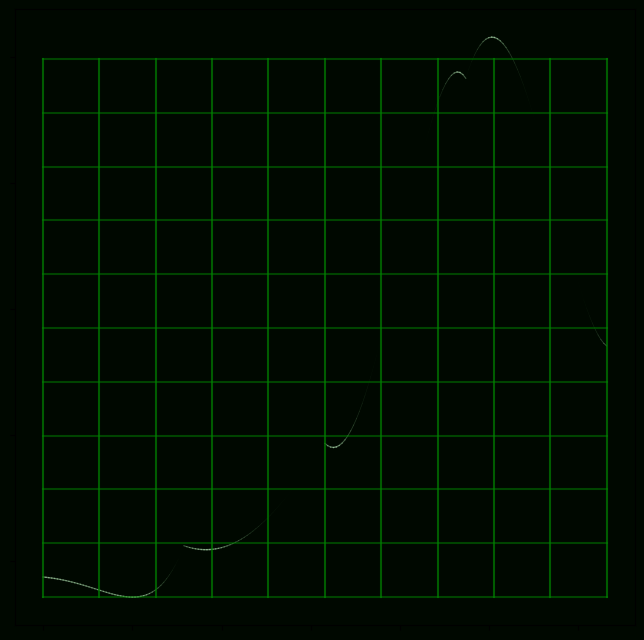

In [69]:
# Plot parameters
Num_vertical_lines = 10
Num_horizontal_lines = 10
vector_lines_color = 'green'
RGB_brightest_trace = (0.8, 1, 0.8)
RGB_darkest_trace = (0, 0.2, 0)
backgroung_color = '#000800'
grid_opacity = 0.7
graph_opacity = 0.5
grid_linewidth = 1
graph_linewidth = 1

# Set up the figure with a black background and white grid lines
fig, ax = plt.subplots(figsize=(12, 12), facecolor=backgroung_color)


############################################ Data ############################################

# Generate some example data for the waveform

# Gaussian function: mean = 0, standard deviation = 1
x = np.linspace(0, 10, 20)
mu = 0  # Mean
sigma = 1  # Standard deviation
gaussian = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-(x - 5 - mu)**2 / (2 * sigma**2))

# Add some random noise to the Gaussian
noise = np.random.normal(0, 0.02, x.shape)  # Noise with mean 0 and small standard deviation
y = noise + gaussian

# Create a colormap with a more pronounced gradient (dark green to bright green)
green_cmap = LinearSegmentedColormap.from_list('custom_gradient', [RGB_darkest_trace, RGB_brightest_trace])  # Dark green to light green

# Walk though data function interpolating the path 3 points at a time
Num_sample_points = 4
poly_degree = Num_sample_points + 1 # An Nth order polynomial can fit N-1 points
Interpolation_factor = 50  # Number of interpolated points between the sample points
max_x = 0
min_x = 0
max_y = 0
min_y = 0
for index in range(0, int((len(x)-Num_sample_points) / Num_sample_points)):

    # Get a sample of Num points to interpolate 
    x_sampled = x[(Num_sample_points-1)*index : (Num_sample_points-1)*index+Num_sample_points]
    y_sampled = y[(Num_sample_points-1)*index : (Num_sample_points-1)*index+Num_sample_points]

    # Fit a polynomial of the specified degree to the sampled points
    poly_coeffs = np.polyfit(x_sampled, y_sampled, poly_degree)

    # Generate new x-values for interpolation between the sampled points
    min_x_sampled = x_sampled[0]
    max_x_sampled = x_sampled[-1]
    min_y_sampled = y_sampled.min()
    max_y_sampled = y_sampled.max()
    x_interpolated = np.linspace(min_x_sampled, max_x_sampled, Interpolation_factor)

    # Evaluate the polynomial at the interpolated x-values
    y_interpolated = np.polyval(poly_coeffs, x_interpolated)

    # Electron ray speed is the gradient (used to determine brightness/green intensity)
    dydx = abs(np.gradient(y_interpolated, x_interpolated))

    # Normalize the derivative values for color mapping
    norm = Normalize(vmin=np.min(dydx), vmax=np.max(dydx))
    z = 1 - norm(dydx)  # Invert so that higher speeds generate darker greens

    # Plot each interpolated segment with varying color based on speed
    for index in range(0, len(x_interpolated)-1):
        ax.plot([x_interpolated[index], x_interpolated[index+1]], 
                [y_interpolated[index], y_interpolated[index+1]], 
                color=green_cmap(z[index]),
                linewidth=graph_linewidth*z[index], 
                alpha=graph_opacity*z[index])
    
    
    # Keep count of where to place limits on graph
    if (max_x_sampled > max_x):
        max_x = max_x_sampled

    if (min_x_sampled < min_x):
        min_x = min_x_sampled

    if (max_y_sampled > max_y):
        max_y = max_y_sampled

    if (min_y_sampled < min_y):
        min_y = min_y_sampled

    




############################################ Grid ############################################

# Make a fake grid line because I can't get ax.grid to do what I want.
x_ticks_spacing = ( max_x - min_x ) / Num_vertical_lines

for index in range(0, Num_vertical_lines+1):
    # Create a vertical line defined by 2 points at the intended horizontal position that goes from minimum graph to max graph height
    x_points = [min_x + index * x_ticks_spacing, min_x + index * x_ticks_spacing]
    y_points = [min_y, max_y]
    ax.plot(x_points, y_points, linestyle='-', color=vector_lines_color, alpha=grid_opacity)

y_ticks_spacing = ( max_y - min_y ) / Num_horizontal_lines
for index in range(0, Num_horizontal_lines+1):
    # Create a vertical line defined by 2 points at the intended horizontal position that goes from minimum graph to max graph height
    x_points = [min_x, max_x]
    y_points = [min_y + index * y_ticks_spacing, min_y + index * y_ticks_spacing]
    ax.plot(x_points, y_points, linestyle='-', color=vector_lines_color, alpha=graph_opacity)


# Customize the plot to simulate an oscilloscope look
ax.set_facecolor(backgroung_color)  # Black background

# Remove axis ticks and labels for a cleaner look
ax.set_xticklabels([])
ax.set_yticklabels([])




############################################ Text ############################################

# Graphed text parameters
font = 'monospace'
plt.rcParams['font.size'] = 8  # Set default font size for all text
plt.rcParams['font.weight'] = 'bold'  # Set default font weight (normal, bold, etc.)
plt.rcParams['font.style'] = 'normal'  # Set default font style (normal, italic, oblique)
#plt.rcParams['text.color'] = ''  # Set default font color
plt.rcParams['text.usetex'] = False  # Disable LaTeX processing
plt.rcParams['font.family'] = font  # Set to desired font

# Add text to simulate an oscilloscope display (adjust positions as needed)
top_height = max_y*1.01
lower_height = min_y*1.3
line_height = 0.1

'''
plt.text(0, top_height, "0.0dBm", color=vector_lines_color, alpha=graph_opacity)
plt.text(-0.6, top_height, "REF", color=vector_lines_color, alpha=graph_opacity)
plt.text(1.2, top_height, "ATTEN 10 dB", color=vector_lines_color, alpha=graph_opacity)

plt.text(-0.6, lower_height, "START", color=vector_lines_color, alpha=graph_opacity)
plt.text(0.2, lower_height, "0 Hz", color=vector_lines_color, alpha=graph_opacity)
plt.text(8.0, lower_height, "RBW 1 MHz", color=vector_lines_color, alpha=graph_opacity)
'''
plt.savefig('original.png')
# Display the plot
plt.show()


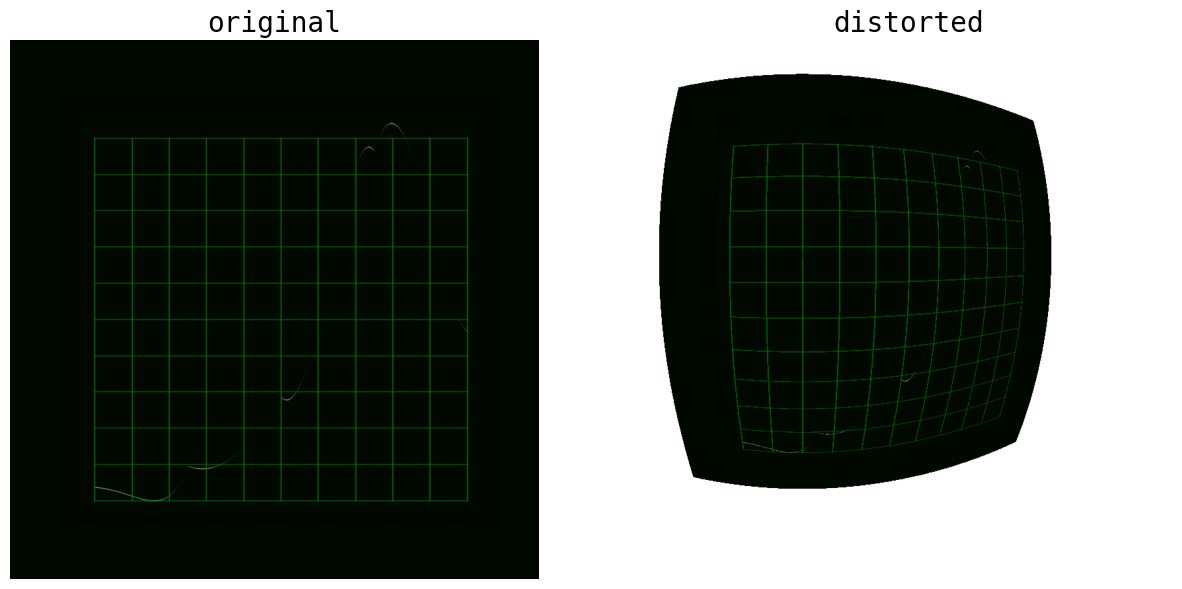

In [70]:
K = np.array( [[338.37324094,0,319.5],[0,339.059099,239.5],[0,0,1]], dtype=np.float32)   # camera intrinsic parameters
d = np.array([0.17149, -0.27191, 0.25787, -0.08054], dtype=np.float32) # k1, k2, k3, k4 - distortion coefficients

def apply_fisheye_effect(img, K, d):

   indices = np.array(np.meshgrid(range(img.shape[0]), range(img.shape[1]))).T \
            .reshape(np.prod(img.shape[:2]), -1).astype(np.float32)

   Kinv = np.linalg.inv(K)
   indices1 = np.zeros_like(indices, dtype=np.float32)
   for i in range(len(indices)):
      x, y = indices[i]
      indices1[i] = (Kinv @ np.array([[x], [y], [1]])).squeeze()[:2]
   indices1 = indices1[np.newaxis, :, :]

   in_indices = cv2.fisheye.distortPoints(indices1, K, d)
   indices, in_indices = indices.squeeze(), in_indices.squeeze()

   distorted_img = np.zeros_like(img)
   for i in range(len(indices)):
      x, y = indices[i]
      ix, iy = in_indices[i]
      if (ix < img.shape[0]) and (iy < img.shape[1]):
         distorted_img[int(ix),int(iy)] = img[int(x),int(y)]

   return distorted_img

K = np.array( [[338.37324094,0,319.5],[0,339.059099,239.5],[0,0,1]],dtype=np.float32) # camera intrinsic params
d = np.array([0.17149, -0.27191, 0.25787, -0.08054],dtype=np.float32) # k1, k2, k3, k4 - distortion coefficients

img = plt.imread('original.png')
img = img / img.max()
distorted_img = apply_fisheye_effect(img, K, d)

plt.figure(figsize=(15,7))
plt.subplot(121), plt.imshow(img, aspect='auto'), plt.axis('off'), plt.title('original', size=20)
plt.subplot(122), plt.imshow(distorted_img, aspect='auto'), plt.axis('off'), plt.title('distorted', size=20)
plt.show()

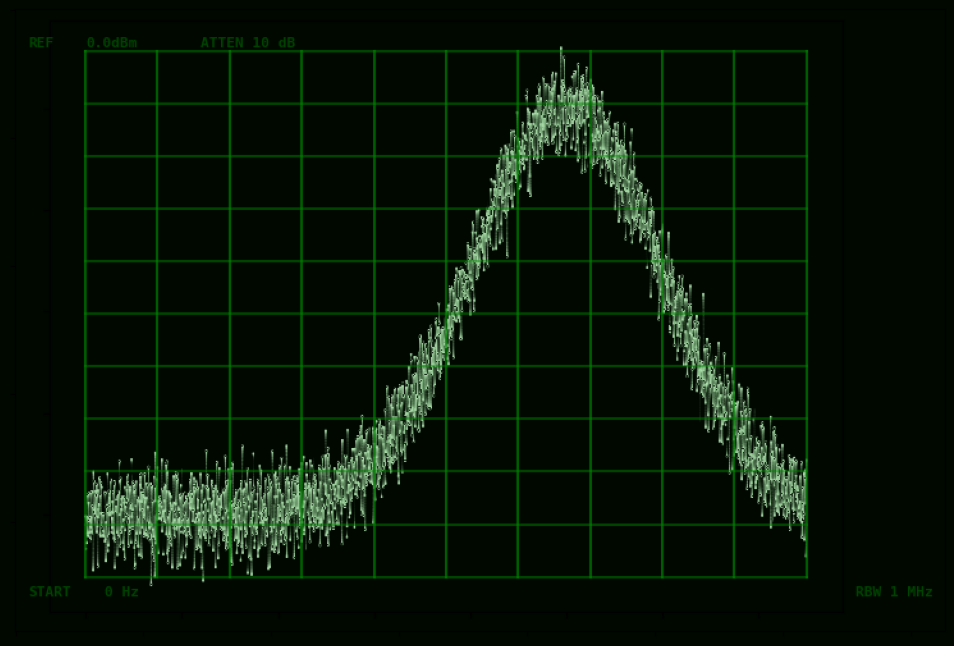

In [83]:
from PIL import Image, ImageFilter
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the image using Pillow
image = Image.open('Final_flat.png')

# Check if the image has an alpha channel (RGBA)
if image.mode == 'RGBA':
    # Convert the original image to RGB to remove alpha channel
    image = image.convert("RGB")

# Convert the image to an array for processing
image_array = np.array(image)

# Get image dimensions (height, width, channels)
h, w = image_array.shape[:2]

# Step 2: Apply a filter to isolate the bright areas of the image
# Convert the image to grayscale to create a brightness mask
gray_image = image.convert('L')  # Convert to grayscale

# Threshold the grayscale image to isolate bright areas (adjust threshold as needed)
threshold_value = 200  # Adjust this value (0 to 255) to set the brightness threshold
bright_areas = np.array(gray_image) > threshold_value

# Step 3: Apply Gaussian blur to the image to simulate bloom
bloom_image = image.filter(ImageFilter.GaussianBlur(radius=40))  # Adjust radius for bloom effect

# Convert the bloom image to RGB to ensure it matches the original image's format
bloom_image = bloom_image.convert("RGB")

# Step 4: Blend the blurred bloom image with the original image
bloomed_array = np.where(np.repeat(bright_areas[:, :, np.newaxis], 3, axis=2), np.array(bloom_image), image_array)

# Convert back to Image format
bloomed_image = Image.fromarray(bloomed_array.astype('uint8'))

# Step 5: Display the bloomed image
fig, ax = plt.subplots(figsize=(12, 12), facecolor=backgroung_color)
plt.imshow(bloomed_image)
# Remove axis ticks and labels for a cleaner look
ax.set_xticklabels([])
ax.set_yticklabels([])
#plt.savefig('blurr_comparison.png')
plt.show()
